# Astronomical Data Analysis with Python Using Astropy and Astroquery

## Introduction

In this article, we will introduce Astropy and Astroquery, two powerful Python libraries for astronomical data analysis. We will show you how to use these libraries with step-by-step installation, usage and sample code. We will also provide some useful tips and tricks to help you get started with astronomical data analysis using Python.

## Install the required libraries

### Juypter Notebook

Install classic Jupyter Notebook pip:
```bash
pip install notebook
```

Run JupyterNotebook:
```bash
jupyter notebook
```

Jupyter Official Document: [Installing Jupiter Notebook](!https://jupyter.org/install)

Or you can use [Anaconda](!https://www.anaconda.com/products/distribution)

### Astropy

Astropy is a Python package that offers tools and functions that are useful for various tasks in astronomy and astrophysics, including and not limited to planning an observation, reducing the data from the observation, analysing it, and other numerical and modeling tasks.

To install Astropy, you can use pip:
```bash
pip install astropy
```

Astropy Official Document: [Astropy](!https://docs.astropy.org/en/stable/)

### Astroquery
Astroquery is a set of tools for querying astronomical web forms and databases.

There are two other packages with complimentary functionality as Astroquery: pyvo is an Astropy affiliated package, and Simple-Cone-Search-Creator to generate a cone search service complying with the IVOA standard. They are more oriented to general virtual observatory discovery and queries, whereas Astroquery has web service specific interfaces.

To install Astroquery, you can use pip:
```bash
pip install astroquery
```

Astroquery Official Document: [Astroquery](!https://astroquery.readthedocs.io/en/latest/)


## Usage

### Astropy
Astropy provides a wide range of tools for astronomical data analysis. Here are some of the most commonly used features:

Astropy provides a wide range of tools for astronomical data analysis. Here are some of the most commonly used features:

- Units and constants: Astropy provides a wide range of units and constants for astronomical calculations. You can use these units and constants to perform calculations with physical quantities.
- Time and dates: Astropy provides tools for working with time and dates in astronomy. You can use these tools to convert between different time scales, calculate the phase of the moon, and perform other time-related calculations.
- Coordinates: Astropy provides tools for working with astronomical coordinates. You can use these tools to convert between different coordinate systems, calculate the separation between two objects, and perform other coordinate-related calculations.
- Tables: Astropy provides tools for working with tabular data in astronomy. You can use these tools to read and write data tables, perform calculations on tables, and plot tables.
- FITS files: Astropy provides tools for working with FITS files, a common file format used in astronomy. You can use these tools to read and write FITS files, access the data in FITS files, and perform other operations on FITS files.
- ...and much more! :)

In [8]:
# units and constants
from astropy import constants as const
from astropy import units as u

print(const.G)
print(const.c)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018
  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


### Astroquery
Astroquery provides a wide range of tools for querying astronomical web forms and databases. Here are some of the most commonly used features:

- Querying web forms: Astroquery provides tools for querying astronomical web forms. You can use these tools to search for astronomical objects, download data from astronomical databases, and perform other operations on the web.
- Querying databases: Astroquery provides tools for querying astronomical databases. You can use these tools to search for astronomical objects, download data from astronomical databases, and perform other operations on the data.
- Querying catalogs: Astroquery provides tools for querying astronomical catalogs. You can use these tools to search for astronomical objects in catalogs, download data from catalogs, and perform other operations on the data.
- Querying images: Astroquery provides tools for querying astronomical images. You can use these tools to search for astronomical images, download images from astronomical databases, and perform other operations on the images.
- ...and much more! :)

### Gaia data query from ESA(European Space Agency) database

* [GAIA DR3]('https://www.cosmos.esa.int/web/gaia/dr3)
 
<img src="https://www.cosmos.esa.int/documents/29201/1666086/GDR2_fluxRGB_cartesian_1000x500.png/823c19eb-2f5e-517a-86a4-c8e8f80b100f?t=1525786477803">


In [11]:
# Import the necessary libraries

from astroquery.gaia import Gaia # Import the Gaia module from the astro
tables = Gaia.load_tables(only_names=True) # Load the available Gaia tables from the ESA database
print(tables[0:2])

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
[<astroquery.utils.tap.model.taptable.TapTableMeta object at 0x7fe563a08e10>, <astroquery.utils.tap.model.taptable.TapTableMeta object at 0x7fe563a08e90>]


#### Read Gaia Data Release 3 (Gaia DR3) table


In [13]:
# Print the tables that contain 'gaiadr3' in their names
gaiadr3 = [table.get_qualified_name() for table in tables if 'gaiadr3' in table.get_qualified_name()]
print(gaiadr3[0:2])


['gaiadr3.gaiadr3.gaia_source', 'gaiadr3.gaiadr3.gaia_source_lite']


In [14]:
# Query the Gaia DR3 table : gaia_source 
query = """SELECT TOP 10 * FROM gaiadr3.gaia_source"""
job = Gaia.launch_job(query)
result = job.get_results()
print(result)

    solution_id             DESIGNATION          ... libname_gspphot
                                                 ...                
------------------- ---------------------------- ... ---------------
1636148068921376768 Gaia DR3 1247114191857269120 ...         PHOENIX
1636148068921376768 Gaia DR3 1247114264872561920 ...           MARCS
1636148068921376768 Gaia DR3 1247114294936486272 ...                
1636148068921376768 Gaia DR3 1247114329296223872 ...                
1636148068921376768 Gaia DR3 1247114329298857728 ...                
1636148068921376768 Gaia DR3 1247114329298859008 ...                
1636148068921376768 Gaia DR3 1247114333591419008 ...           MARCS
1636148068921376768 Gaia DR3 1247114333592038144 ...                
1636148068921376768 Gaia DR3 1247114363655964928 ...           MARCS
1636148068921376768 Gaia DR3 1247114363655966336 ...           MARCS


In [15]:
# Query the Gaia DR3 table : gaiaedr3.gaia_source from parallax > 10
query = """SELECT * FROM gaiadr3.gaia_source WHERE parallax > 50"""
job = Gaia.launch_job(query)
result = job.get_results()
print(result.columns)
result[0:2]

<TableColumns names=('solution_id','DESIGNATION','SOURCE_ID','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pm','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','nu_eff_used_in_astrometry','pseudocolour','pseudocolour_error','ra_pseudocolour_corr','dec_pseudocolour_corr','parallax_pseudocolour_corr','pmra_pseudocolour_corr','pmdec_pseudocolour_corr','astrometric_matched_transits','visibility_periods_used','astrometric_sigma5d_max','matched_transits','new_matched_transits','matched_transits_removed','ip

solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,

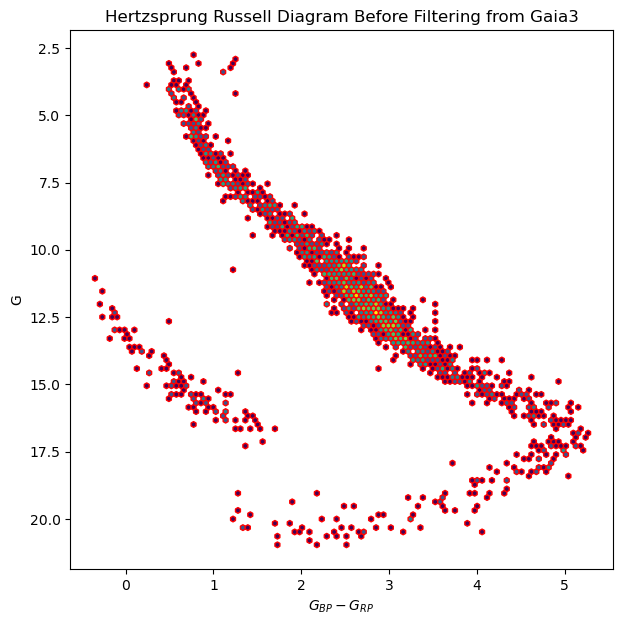

In [16]:
## Data Visualization
import matplotlib.pyplot as plt

bp_rp = result['phot_bp_mean_mag'] - result['phot_rp_mean_mag']
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.hexbin(bp_rp, result['phot_g_mean_mag'],bins='log', mincnt=1,  color= 'red')
ax.set_xlabel(r"$G_{BP} - G_{RP}$")
ax.set_ylabel(r"G")
ax.set_title("Hertzsprung Russell Diagram Before Filtering from Gaia3")
ax.invert_yaxis()
plt.show()

In [17]:
## Search article from NASA ADS (Astrophysics Data System)
from astroquery.simbad import Simbad

result_table = Simbad.query_object("M31")
# print result table with all columns
print(result_table.columns)
# print the result table with the selected columns
print(result_table['COO_BIBCODE'])

<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE','SCRIPT_NUMBER_ID')>
    COO_BIBCODE    
-------------------
2006AJ....131.1163S


## Conclusion
In this article, we introduced Astropy and Astroquery, two powerful Python libraries for astronomical data analysis. We showed you how to use these libraries with step-by-step installation, usage and sample code. We also provided some useful tips and tricks to help you get started with astronomical data analysis using Python.


Full code is available on [GitHub](!https://github.com/cevheri/intro-to-astro)

## References

- [Astropy Source Code](!https://github.com/astropy/astropy)
- [Astropy Tutorial](!https://github.com/astropy/astropy-tutorials)
- [Astropy](!https://docs.astropy.org/en/stable/)
- [Astropy Learn](!https://learn.astropy.org/)
- [Astroquery](!https://astroquery.readthedocs.io/en/latest/)
- [ESA Gaia](!https://www.cosmos.esa.int/web/gaia/dr3)
- [NASA ADS](!https://ui.adsabs.harvard.edu/)
- [Astroquery Gaia](!https://astroquery.readthedocs.io/en/latest/gaia/gaia.html)
- [Astropy intro](!https://philuttley.github.io/prog4aa_lesson2/09-astropyintro/index.html)

---
### Introduction to Astronomy Research Course

- [Intro-2-Astro](!https://github.com/howardisaacson/Intro-to-Astro2024)
 

<img src="https://raw.githubusercontent.com/howardisaacson/Intro-to-Astro2024/main/Web_Banner.gif">



In [33]:
## Deploy to Medium
# !pip install jupyter-to-medium
# !jupyter bundlerextension enable --py jupyter_to_medium._bundler --sys-prefix
jupyter_to_medium --pub-name="into-2-astro" --tags="python, data science" "My Awesome Blog Post.ipynb"